In [1]:
 # data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
file = 'crypto_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
df_sub = df.loc[df.IsTrading].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [6]:
1144 - 685

459

In [7]:
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [8]:
mask = df_sub.TotalCoinsMined > 0 
df_sub = df_sub.loc[mask].reset_index()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            532 non-null    int64  
 1   Unnamed: 0       532 non-null    object 
 2   CoinName         532 non-null    object 
 3   Algorithm        532 non-null    object 
 4   IsTrading        532 non-null    bool   
 5   ProofType        532 non-null    object 
 6   TotalCoinsMined  532 non-null    float64
 7   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 29.7+ KB


In [9]:
crypto_names = df_sub.CoinName

df_sub = df_sub.drop(["Unnamed: 0", 'CoinName'], axis=1)
df_sub.head()

,index,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,1,Scrypt,True,PoW/PoS,1.055185e+09,532000000
2,3,X13,True,PoW/PoS,2.927942e+10,314159265359
3,4,SHA-256,True,PoW,1.792718e+07,21000000
4,5,Ethash,True,PoW,1.076842e+08,0


In [25]:
df_sub["TotalCoinSupply"] = df_sub.TotalCoinSupply.astype(float)
#df_sub["IsTrading"] = df_sub.IsTrading.astype(int)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            532 non-null    int64  
 1   Algorithm        532 non-null    object 
 2   IsTrading        532 non-null    int64  
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 25.1+ KB


In [26]:
print(df_sub.Algorithm.nunique())
df_sub.Algorithm.value_counts()

11


Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

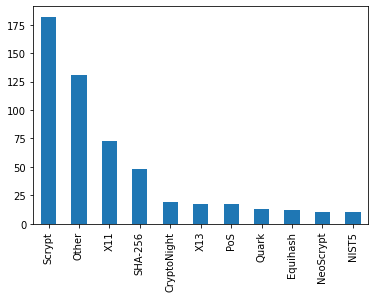

In [27]:
df_sub.Algorithm.value_counts().plot(kind="bar")
plt.show()

In [28]:
algs = df_sub.Algorithm.value_counts()
algs_replace = list(algs[algs < 10].index)
algs_replace[0:10]

[]

In [29]:
mask = df_sub.Algorithm.isin(algs_replace)
df_sub.loc[mask, "Algorithm"] = "Other"

df_sub.Algorithm.value_counts()

Scrypt         182
Other          131
X11             73
SHA-256         48
CryptoNight     19
X13             17
PoS             17
Quark           13
Equihash        12
NeoScrypt       10
NIST5           10
Name: Algorithm, dtype: int64

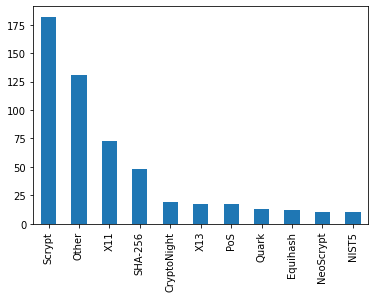

In [30]:
df_sub.Algorithm.value_counts().plot(kind="bar")
plt.show()

In [31]:
print(df_sub.ProofType.nunique())
df_sub.ProofType.value_counts()

4


PoW        238
PoW/PoS    179
PoS         87
Other       28
Name: ProofType, dtype: int64

In [32]:
df_sub.loc[df_sub.ProofType == 'Pos', "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoS', "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == 'PoW/PoW', "ProofType"] = "PoW"

In [33]:
pts = df_sub.ProofType.value_counts()
pts_replace = list(pts[pts < 50].index)
pts_replace[0:10]

['Other']

In [34]:
mask = df_sub.ProofType.isin(pts_replace)
df_sub.loc[mask, "ProofType"] = "Other"

df_sub.ProofType.value_counts()

PoW        238
PoW/PoS    179
PoS         87
Other       28
Name: ProofType, dtype: int64

In [35]:
df_sub.head()

,index,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,0,Scrypt,1,PoW/PoS,4.199995e+01,4.200000e+01
1,1,Scrypt,1,PoW/PoS,1.055185e+09,5.320000e+08
2,3,X13,1,PoW/PoS,2.927942e+10,3.141593e+11
3,4,SHA-256,1,PoW,1.792718e+07,2.100000e+07
4,5,Other,1,PoW,1.076842e+08,0.000000e+00


In [40]:
oh_cols = ["Algorithm", "ProofType"]
df_oh = df_sub.loc[:, oh_cols]

df_oh = pd.get_dummies(df_oh)
df_oh.head()

,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [41]:
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_sub.loc[:,num_cols] 

scaler = StandardScaler()
scaler.fit(df_num)


df_num = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_num.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [42]:
df_train = pd.concat([df_num, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.524946,4.489424,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,-0.116715,-0.152560,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.114747,-0.152870,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [43]:
 # TSNE
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_train)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-18.231478,-10.561707
1,-17.446611,-16.852461
2,6.736205,-7.164013
3,12.267736,0.248191
4,18.208412,11.220787


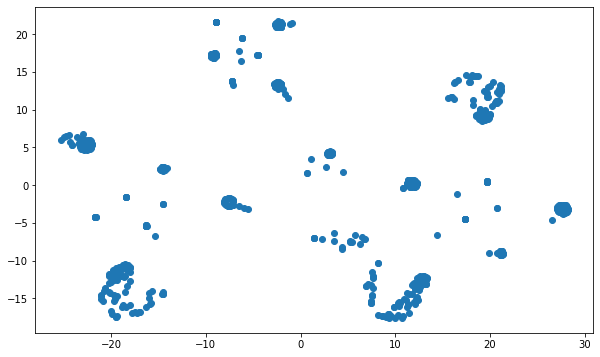

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

In [ ]:
#PCA

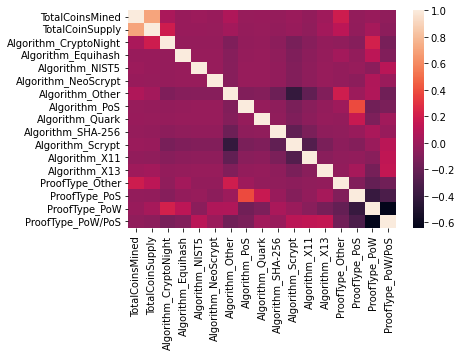

In [48]:
corrs = df_train.corr()

sns.heatmap(corrs)
plt.show()

In [49]:
corrs

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_Equihash,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,Algorithm_Quark,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
TotalCoinsMined,1.000000,0.702301,0.046358,-0.015083,-0.004300,-0.014830,0.064477,-0.020827,-0.018368,-0.025781,-0.009377,-0.042141,0.007338,0.190130,-0.033243,-0.017846,-0.045051
TotalCoinSupply,0.702301,1.000000,0.191816,-0.017729,-0.014702,-0.020049,0.025065,-0.027379,-0.023895,-0.034459,-0.015754,-0.049680,0.022187,0.116568,-0.039411,0.032810,-0.058766
Algorithm_CryptoNight,0.046358,0.191816,1.000000,-0.029235,-0.026637,-0.026637,-0.109997,-0.034965,-0.030458,-0.060606,-0.138778,-0.076749,-0.034965,-0.045361,-0.085094,0.213896,-0.137043
Algorithm_Equihash,-0.015083,-0.017729,-0.029235,1.000000,-0.021026,-0.021026,-0.086827,-0.027600,-0.024042,-0.047840,-0.109545,-0.060582,-0.027600,0.020887,-0.032941,0.117920,-0.108175
Algorithm_NIST5,-0.004300,-0.014702,-0.026637,-0.021026,1.000000,-0.019157,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.032623,-0.023776,-0.068859,0.106490
Algorithm_NeoScrypt,-0.014830,-0.020049,-0.026637,-0.021026,-0.019157,1.000000,-0.079109,-0.025147,-0.021905,-0.043588,-0.099808,-0.055198,-0.025147,-0.032623,-0.061199,0.070324,-0.010682
Algorithm_Other,0.064477,0.025065,-0.109997,-0.086827,-0.079109,-0.079109,1.000000,-0.103845,-0.090459,-0.179995,-0.412159,-0.227939,-0.103845,0.197450,-0.004989,0.073663,-0.166924
Algorithm_PoS,-0.020827,-0.027379,-0.034965,-0.027600,-0.025147,-0.025147,-0.103845,1.000000,-0.028755,-0.057216,-0.131015,-0.072456,-0.033010,0.005038,0.382008,-0.163469,-0.129378
Algorithm_Quark,-0.018368,-0.023895,-0.030458,-0.024042,-0.021905,-0.021905,-0.090459,-0.028755,1.000000,-0.049841,-0.114127,-0.063117,-0.028755,-0.037304,0.160438,-0.117913,0.016128
Algorithm_SHA-256,-0.025781,-0.034459,-0.060606,-0.047840,-0.043588,-0.043588,-0.179995,-0.057216,-0.049841,1.000000,-0.227091,-0.125589,-0.057216,-0.044845,-0.015071,0.046529,-0.015973


[0.495, 0.118, 0.09, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006, 0.005, 0.0, 0.0]


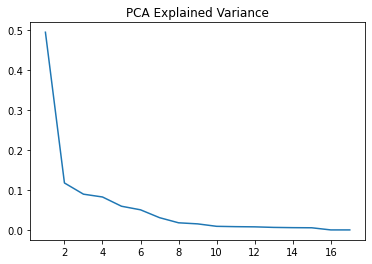

In [53]:
#Initialize PCA Model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [54]:
sum([0.495, 0.118, 0.09, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015])

0.958

In [55]:
len(df_train.columns)

17

In [57]:
sum([0.495, 0.118, 0.09, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006])

0.995

In [60]:
pca = PCA(n_components=0.99)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])

[0.495, 0.118, 0.09, 0.082, 0.059, 0.05, 0.031, 0.018, 0.015, 0.009, 0.008, 0.008, 0.006, 0.006]
